<a href="https://colab.research.google.com/github/Skommireddy/Projects-IDS/blob/main/HW5/Problem_1_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning: Linear Regression using R

The %load_ext magic command loads the rpy2 IPython extension into the notebook, essentially initializing the R interface and allowing the notebook to connect and pass objects between the two languages.

In [51]:
# Start rmagic to mix Python and R code sells
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


matplot is useful for quickly plotting multiple sets of observations from the same object, particularly from a matrix, on the same graph.

In [52]:
import matplotlib.pyplot as plt 

Importing csv file from Github repositiory HW5 folder.
Printing the imported data set companyDF with four columns TV, Radio, Newspaper and Sales.

In [53]:
# Let's read in the data file
%%R
# used to read csv files
library(readr)
# importing the data file from Github Repo.
companyDF <- read_csv("https://raw.githubusercontent.com/Skommireddy/Projects-IDS/main/HW5/Company_data.csv", show_col_types = FALSE)
# printing the data frame
companyDF

# A tibble: 200 × 4
      TV Radio Newspaper Sales
   <dbl> <dbl>     <dbl> <dbl>
 1 230.   37.8      69.2  22.1
 2  44.5  39.3      45.1  10.4
 3  17.2  45.9      69.3  12  
 4 152.   41.3      58.5  16.5
 5 181.   10.8      58.4  17.9
 6   8.7  48.9      75     7.2
 7  57.5  32.8      23.5  11.8
 8 120.   19.6      11.6  13.2
 9   8.6   2.1       1     4.8
10 200.    2.6      21.2  15.6
# … with 190 more rows


Printing first 10 rows in the dataset companyDF.

In [54]:
%%R
head(companyDF, 10)

# A tibble: 10 × 4
      TV Radio Newspaper Sales
   <dbl> <dbl>     <dbl> <dbl>
 1 230.   37.8      69.2  22.1
 2  44.5  39.3      45.1  10.4
 3  17.2  45.9      69.3  12  
 4 152.   41.3      58.5  16.5
 5 181.   10.8      58.4  17.9
 6   8.7  48.9      75     7.2
 7  57.5  32.8      23.5  11.8
 8 120.   19.6      11.6  13.2
 9   8.6   2.1       1     4.8
10 200.    2.6      21.2  15.6


# Summary of Data Frame
The output of summary() contains summary for each column. If the column is numeric type, then the summary would contain information like minimum, maximum, median, mean, etc. If the column is char type, then summary would contain information like length, class and mode.

In [55]:
# Summarizing the data frame. 
%%R
summary(companyDF)

       TV             Radio          Newspaper          Sales      
 Min.   :  0.70   Min.   : 0.000   Min.   :  0.30   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75   1st Qu.:11.00  
 Median :149.75   Median :22.900   Median : 25.75   Median :16.00  
 Mean   :147.04   Mean   :23.264   Mean   : 30.55   Mean   :15.13  
 3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10   3rd Qu.:19.05  
 Max.   :296.40   Max.   :49.600   Max.   :114.00   Max.   :27.00  


From summarizing the data we can observe that 


> Radio has the least Minimum value and 1st quartile where as Sales has the highest min value and Tv has the highest 1st quartile. 


> Sales has the lowest mean, median, 3rd quartile and Maximum values where as TV has the highest mean, median, 3rd quartile and maximum values.






# Examine Correlations
Using Pearson's correlation coefficient between all pairs of attributes Sales has the greatest correlation with sales.

In [56]:
# Let’s compute the standard correlation coefficient (Pearson’s r) between pairs of attributes
# to determine which parameter has the greatest correlation with Sales
%%R
cor_data = cor(companyDF,method = "pearson")
print(cor_data)
print(cor_data[4,])

                  TV      Radio  Newspaper     Sales
TV        1.00000000 0.05480866 0.05664787 0.9012079
Radio     0.05480866 1.00000000 0.35410375 0.3496311
Newspaper 0.05664787 0.35410375 1.00000000 0.1579600
Sales     0.90120791 0.34963110 0.15796003 1.0000000
       TV     Radio Newspaper     Sales 
0.9012079 0.3496311 0.1579600 1.0000000 


# Examine Features with Boxplots
From the below boxplot
> Tv has the wide range of values with median at 150 when compared to other variables.

> Radio and Newspaper has similar range of values with median at 25 approximately where as Sales has the lowest range of values.

> Newspaper also has two outliers above the whiskers.



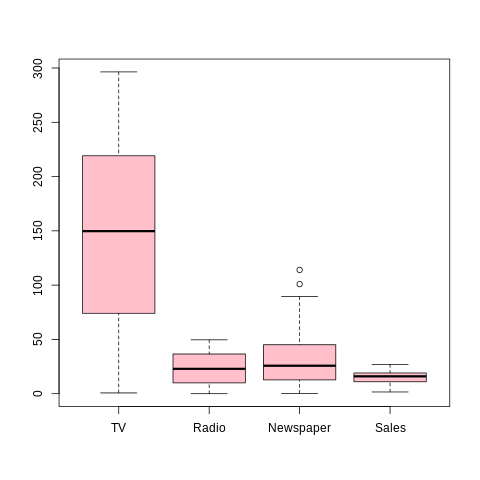

In [57]:
#create barplot
%%R
boxplot(companyDF,col="pink")

# Examine Feature Distributions by plotting Histogram and Kernel density.

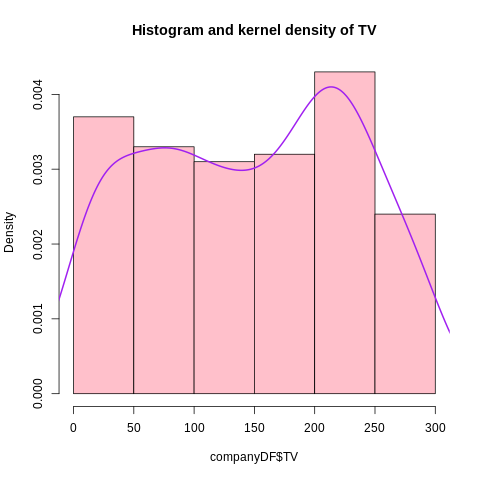

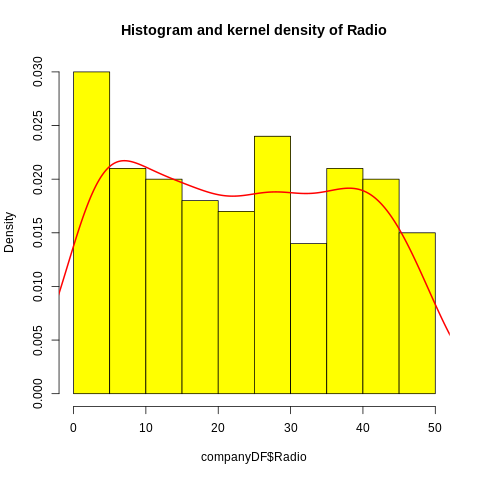

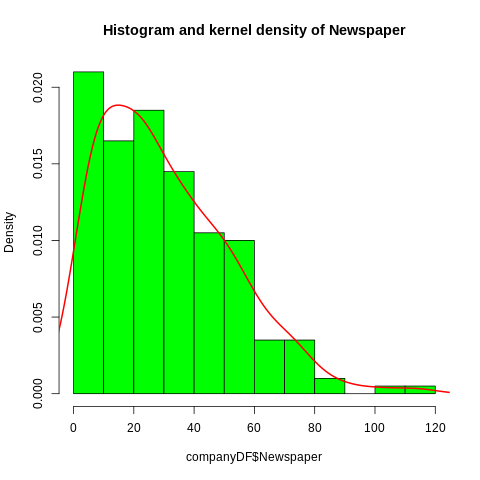

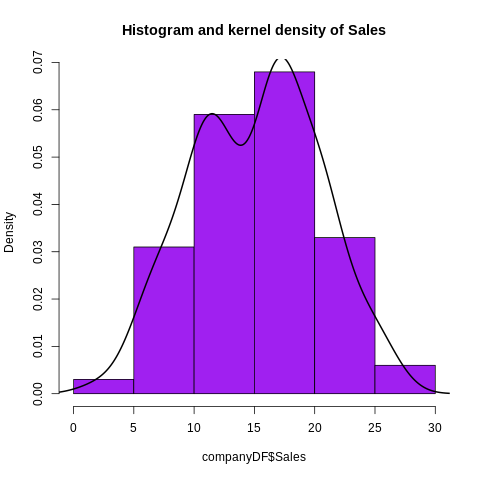

In [58]:
# plotting histogram and  kernel density estimates 
%%R
#create a histogram for TV
hist(companyDF$TV, freq = FALSE, col = "pink",
       main = "Histogram and kernel density of TV")
#calculate density
dx= density(companyDF$TV)
lines(dx, lwd = 2, col = "purple")
#create a histogram for Radio
hist(companyDF$Radio, freq = FALSE, col = "yellow",
       main = "Histogram and kernel density of Radio")
#calculate density
dx= density(companyDF$Radio)
lines(dx, lwd = 2, col = "red")
#create a histogram for Newspaper
hist(companyDF$Newspaper, freq = FALSE, col = "green",
       main = "Histogram and kernel density of Newspaper")
#calculate density
dx= density(companyDF$Newspaper)
lines(dx, lwd = 2, col = "red")
#create a histogram for Sales
hist(companyDF$Sales, freq = FALSE, col = "purple",
       main = "Histogram and kernel density of Sales")
#calculate density
dx= density(companyDF$Sales)
lines(dx, lwd = 2, col = "black")


# Check for Missing Values
*   Determine if there are any missing values
*   If so, decide on the method of imputation, e.g., mean, median, most_frequent

In [59]:
%%R
sum(is.na(companyDF))

[1] 0


There are 0 missing values in companyDF dataframe.

# Bulid the Linear Regression Model
*  y = f(x), where

> y (dependent parameter) = Sales


> x (independent parameter) = TV, Radio, or NewsPaper

From the below scatter plots, TV has a strong positive linear relationship with respect to sales where as Radio and Newspaper have very less or no proper linear relationship with sales.



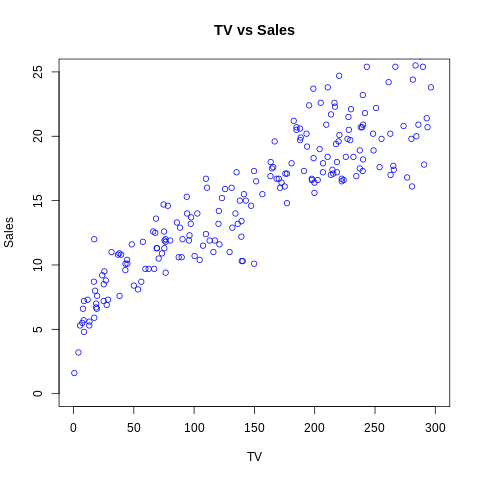

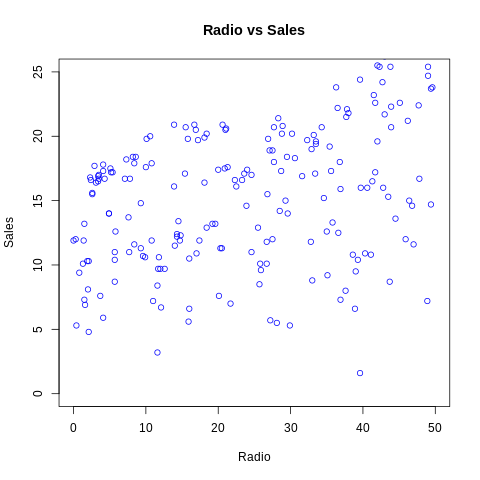

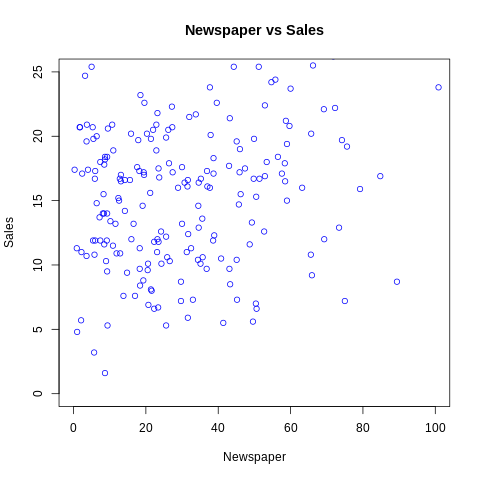

In [60]:
# Here the target variable is the Sales column
%%R
#scatter plot for TV 
plot(x = companyDF$TV,y = companyDF$Sales, col = "blue",
   xlab = "TV", ylab = "Sales", xlim = c(0,300), ylim = c(0,25),		 
   main = "TV vs Sales"
)
#scatter plot for Radio 
plot(x = companyDF$Radio,y = companyDF$Sales, col = "blue",
   xlab = "Radio", ylab = "Sales", xlim = c(0,50), ylim = c(0,25),		 
   main = "Radio vs Sales"
)
#scatter plot for Newspaper 
plot(x = companyDF$Newspaper,y = companyDF$Sales, col = "blue" ,
   xlab = "Newspaper", ylab = "Sales", xlim = c(0,100), ylim = c(0,25),		 
   main = "Newspaper vs Sales"
)

Recall the dataset contains amounts spent on different types of advertisements and the resulting Sales. Build the following linear models and plot the obtained MSE and R2 values for each model


> Sales vs. TV


> Sales vs. (TV, Radio, Newspaper)

# Use the Entire Data Set for Training to calculate Intercept and Slope
The intercept is 6.97482 and slope is 0.5546
# Sales= 6.97 + 0.05*TV

In [83]:
%%R
data("companyDF")
x <- companyDF$TV
y <- companyDF$Sales
lm_TV <- lm(y ~ x, data = companyDF)
lm_TV


Call:
lm(formula = y ~ x, data = companyDF)

Coefficients:
(Intercept)            x  
    6.97482      0.05546  



# Calculate R Squared value
The R Squared value is 0.8121757

In [84]:
%%R
summary(lm_TV)$r.squared

[1] 0.8121757


# Calculate Mean Square Error
The MSE value is 5.217744

In [85]:
%%R
mean(lm_TV$residuals^2)

[1] 5.217744


# Sales vs. (TV, Radio, Newspaper)
The intercept value is 4.57357 and slope is 0.05256

In [86]:
%%R
x=companyDF$Sales
y=companyDF$TV+companyDF$Radio+companyDF$Newspaper
lm_all<- lm(x ~ y, data = companyDF,)
lm_all


Call:
lm(formula = x ~ y, data = companyDF)

Coefficients:
(Intercept)            y  
    4.57357      0.05256  



# Calculate R Squared value
The R Squared value is 0.8554715

In [87]:
%%R
summary(lm_all)$r.squared

[1] 0.8554715


# Calculate Mean Square Error
The MSE value is 4.014991

In [88]:
%%R
mean(lm_all$residuals^2)

[1] 4.014991


# Install caret package

In [67]:
%%R
install.packages("caret")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/caret_6.0-91.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2332862 bytes (2.2 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

In [68]:
%%R
library(caret)

In [69]:
%%R
library(caret)
set.seed(110)
indexes <- createDataPartition(y=companyDF$Sales, p = 0.7,list = FALSE,)
train<-companyDF[indexes,]
test<-companyDF[-indexes,]

# Linear Model: Sales = 6.97 + 0.05 * TV
Spliting the Data into Training and Testing in the ration 70-30

In [70]:
# Let's experiment again, but this time split the data into training and testing sets

# random_state controls the shuffling of input data and allows us to reproduce the 
# same results each time

%%R
library(caret) 

set.seed(120)
indexes <- sort(sample(nrow(companyDF),nrow(companyDF)*0.70))
train <- companyDF[indexes,]
test <- companyDF[-indexes,]

In [71]:
# 70% of 200 cases are used for training now
%%R
dim(train['Sales'])

[1] 140   1


In [72]:
# 30% of 200 cases are set aside for testing
%%R
dim(test['Sales'])

[1] 60  1


# Build linear model after training the data of Sales and TV



In [89]:
%%R
data("companyDF")
x <- train$TV
y <- train$Sales
lm_TV1 <- lm(y ~ x, data = test)
lm_TV1


Call:
lm(formula = y ~ x, data = test)

Coefficients:
(Intercept)            x  
    6.84375      0.05582  



Linear Model: Sales = 6.84 + 0.05 * TV

# Calculate R Squared value
The R Squared value is 0.8080171

In [90]:
%%R
summary(lm_TV1)$r.squared

[1] 0.8080171


# Calculate Mean Square Error
The MSE value is 5.467566

In [91]:
%%R
mean(lm_TV1$residuals^2)

[1] 5.467566


# Build linear model after training the data of Sales vs. (TV, Radio, Newspaper)

In [92]:
%%R
y = train$Sales
x = trainX =train$TV+train$Radio+train$Newspaper

lm_all1 <- lm(y ~ x)
lm_all1


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
    4.57685      0.05218  



# Calculate R Squared value
The R Squared value is 0.8491093

In [93]:
%%R
summary(lm_all1)$r.squared

[1] 0.8491093


# Calculate Mean Square Error
The MSE value is 4.297284

In [94]:
%%R
mean(lm_all1$residuals^2)

[1] 4.297284


# Summary
Model trained and tested on the entire data set of 200 cases (Sales vs TV):

Sales = 6.97 + 0.05 * TV

Model trained on 70% of the data and tested on 30% of the data (Sales vs TV):

Sales = 6.84 + 0.05 * TV 

Model trained and tested on the entire data set of 200 cases (Sales vs (TV, Radio, Newspaper)):

Sales = 4.57 + 0.05 * TV

Model trained on 70% of the data and tested on 30% of the data (Sales vs (TV, Radio, Newspaper)):

Sales = 4.57 + 0.05 * TV 


# Plot for sales vs TV
From the below graph we can say that there is no much difference in the accuracy from trained data to complete data.

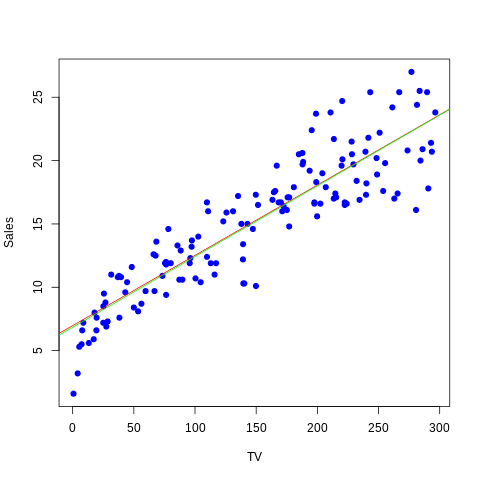

In [100]:
# plot the best fit linear models for sales vs TV
%%R
coefs <- coef(lm_TV)
coefs1 <- coef(lm_TV1)
plot(Sales ~ TV, data = train, pch = 19,col="blue")
abline(coefs, col = "red")
abline(coefs1, col = "green")

# Plot for Sales vs. (TV, Radio, Newspaper)
From the below graph we can say that there is no much difference in the accuracy from trained data to complete data.

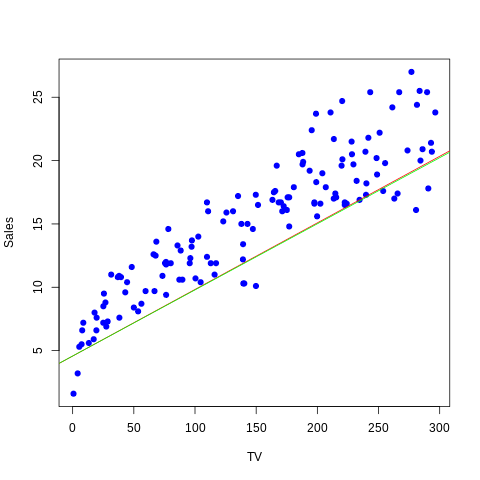

In [101]:
# plot the best fit linear models for sales vs (TV, Radio, Newspaper)
%%R
coefs <- coef(lm_all)
coefs1 <- coef(lm_all1)
plot(Sales ~ TV, data = train, pch = 19,col="blue")
abline(coefs, col = "red")
abline(coefs1, col = "green")